In [ ]:
!nvidia-smi

Thu Mar 10 04:02:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip install pyEDFlib

In [ ]:
import pyedflib
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import warnings 
import random
import collections
from PIL import Image
from numpy.random import seed 

warnings.filterwarnings("ignore")

In [ ]:
from scipy.signal import butter, sosfilt, sosfreqz

**butter worth bandpass filter**

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

In [ ]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

**setting frequency**

In [ ]:
lowcut = 0.5
highcut = 30
fs = 256

In [ ]:
pathDataSet = '/content/drive/MyDrive/chb_03/'
patients = ["03"]

In [ ]:
def loadSummaryPatient(index):
  f = open(pathDataSet+'chb'+patients[index]+'/chb'+patients[index]+'-summary.txt', 'r')
  parent = 'chb'+patients[index]+'/'
  return f, parent

**create the image dataset for time domain**

In [ ]:
def createDataset():

    print("START \n")
    for indexPatient in range(0, len(patients)):
        # fileList = []
    
        f, parent = loadSummaryPatient(indexPatient)
        line=f.readline()
        while (line):
            data=line.split(':')
            if (data[0]=="File Name"):
                name_F=data[1].strip()
                print(name_F)
                for i in range(3):
                    line=f.readline()
                for j in range(0, int(line.split(': ')[1])):
                    secSt=int(f.readline().split(': ')[1].split(' ')[0])
                    secEn=int(f.readline().split(': ')[1].split(' ')[0])
                    seizureImageGenerate(secSt, secEn, name_F, parent)

            line=f.readline()
        f.close()

    print("END \n")

**function to generate time images**





In [ ]:
def seizureImageGenerate(secSt, secEn, name_F, parent):
  file1 = pyedflib.EdfReader(pathDataSet+parent+name_F)
  n = file1.signals_in_file
  # print(n)
  signal_labels = file1.getSignalLabels()
  signal_headers = file1.getSignalHeaders()
  rate = signal_headers[0]['sample_rate']
  dur = file1.getFileDuration()
  x = np.zeros((n, file1.getNSamples()[0]))
  for i in range(n):
    x[i,:] = file1.readSignal(i)
    # print(x)
    label = file1.getLabel(i)
  file1.close()
  x_filter = butter_bandpass_filter(x ,lowcut , highcut , fs , order = 5)
  #a = os.getcwd()
  path = '/content/mix_data/'+ parent
  if os.path.isdir(path) is not True:
    os.makedirs(path)
  picnum = int(dur*rate/256)
  for i in range(picnum):
    img = x_filter[:,i*256:(i+1)*256]
    Img = Image.fromarray(np.uint8(img))
    if secSt <= i+1 <= secEn: #window size is 1sec
      filename = '_time_seizure_'+ str(i)
      Img.save(path + name_F.split('.')[0] + filename+'.jpg')
    else:
      filename = '_time_nonseizure_'+ str(i)
      Img.save(path + name_F.split('.')[0] + filename+'.jpg')

In [ ]:
createDataset()

START 

chb03_01.edf
chb03_02.edf
chb03_03.edf
chb03_04.edf
chb03_05.edf
chb03_06.edf
chb03_07.edf
chb03_08.edf
chb03_09.edf
chb03_10.edf
chb03_11.edf
chb03_12.edf
chb03_13.edf
chb03_14.edf
chb03_15.edf
chb03_16.edf
chb03_17.edf
chb03_18.edf
chb03_19.edf
chb03_20.edf
chb03_21.edf
chb03_22.edf
chb03_23.edf
chb03_24.edf
chb03_25.edf
chb03_26.edf
chb03_27.edf
chb03_28.edf
chb03_29.edf
chb03_30.edf
chb03_31.edf
chb03_32.edf
chb03_33.edf
chb03_34.edf
chb03_35.edf
chb03_36.edf
chb03_37.edf
chb03_38.edf
END 



**function to generate frequency images**

In [ ]:
def seizureImageGenerate_freq(secSt, secEn, name_F, parent):
  file1 = pyedflib.EdfReader(pathDataSet+parent+name_F)
  n = file1.signals_in_file
  # print(n)
  signal_labels = file1.getSignalLabels()
  signal_headers = file1.getSignalHeaders()
  rate = signal_headers[0]['sample_rate']
  dur = file1.getFileDuration()
  x = np.zeros((n, file1.getNSamples()[0]))
  for i in range(n):
    x[i,:] = file1.readSignal(i)
    # print(x)
    label = file1.getLabel(i)
  file1.close()
  x_filter = butter_bandpass_filter(x ,lowcut , highcut , fs , order = 5)
  dft = np.fft.fft(x_filter, axis=1)
  #a = os.getcwd()
  path = '/content/mix_data/'+ parent
  if os.path.isdir(path) is not True:
    os.makedirs(path)
  picnum = int(dur*rate/256)
  for i in range(picnum):
    img = dft[:,i*256:(i+1)*256]
    Img = Image.fromarray(np.uint8(img))
    if secSt <= i+1 <= secEn: #window size of 1sec
      filename = '_freq_seizure_'+ str(i)
      Img.save(path + name_F.split('.')[0] + filename+'.jpg')
    else:
      filename = '_freq_nonseizure_'+ str(i)
      Img.save(path + name_F.split('.')[0] + filename+'.jpg')

**create the image dataset for frequency domain**

In [ ]:
def createDataset_freq():

    print("START \n")
    for indexPatient in range(0, len(patients)):
        # fileList = []
    
        f, parent = loadSummaryPatient(indexPatient)
        line=f.readline()
        while (line):
            data=line.split(':')
            if (data[0]=="File Name"):
                name_F=data[1].strip()
                print(name_F)
                for i in range(3):
                    line=f.readline()
                for j in range(0, int(line.split(': ')[1])):
                    secSt=int(f.readline().split(': ')[1].split(' ')[0])
                    secEn=int(f.readline().split(': ')[1].split(' ')[0])
                    seizureImageGenerate_freq(secSt, secEn, name_F, parent)

            line=f.readline()
        f.close()

    print("END \n")

In [ ]:
createDataset_freq()

START 

chb03_01.edf
chb03_02.edf
chb03_03.edf
chb03_04.edf
chb03_05.edf
chb03_06.edf
chb03_07.edf
chb03_08.edf
chb03_09.edf
chb03_10.edf
chb03_11.edf
chb03_12.edf
chb03_13.edf
chb03_14.edf
chb03_15.edf
chb03_16.edf
chb03_17.edf
chb03_18.edf
chb03_19.edf
chb03_20.edf
chb03_21.edf
chb03_22.edf
chb03_23.edf
chb03_24.edf
chb03_25.edf
chb03_26.edf
chb03_27.edf
chb03_28.edf
chb03_29.edf
chb03_30.edf
chb03_31.edf
chb03_32.edf
chb03_33.edf
chb03_34.edf
chb03_35.edf
chb03_36.edf
chb03_37.edf
chb03_38.edf
END 



In [ ]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, Flatten, LSTM, Bidirectional, ConvLSTM2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalMaxPooling2D, BatchNormalization, TimeDistributed, SimpleRNN, GRU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc, fbeta_score

**Data Loader**

In [ ]:
def generatePathList(patients, test_size):
    parent_path = '/content/mix_data/'
    pathList = []
    for indexPatient in range(0, len(patients)):
        sub_path = 'chb'+patients[indexPatient]+'/'
        directory_name = parent_path+sub_path
        for filename in os.listdir(directory_name):
            pathList.append(directory_name+filename)
    L = len(pathList)
    test_index = int(L*test_size)
    index = random.sample(range(L), L)
    return index[:test_index],index[test_index:],pathList

class DataGenerator(Sequence):

    def __init__(self, index, pathList, parent_path = '/content/mix_data/', batch_size=32):
        self.batch_size = batch_size
        self.parent_path = parent_path
        self.pathList = pathList
        self.index = index
        self.L = len(self.index)


    def __len__(self):
        return self.L - self.batch_size

    def __getitem__(self, idx):
        batch_indexs = self.index[idx:(idx+self.batch_size)]
        image_path = [self.pathList[k] for k in batch_indexs]
    
        return self._load_image(image_path)

  
    def _load_image(self, image_path):
        features = np.zeros(((len(image_path)),23,256))
        labels = np.zeros((len(image_path)),dtype=int)
        i = 0 #the feature index
        for name in image_path:
            #print(name)
            if '_seizure_' in name:
                features[i] = np.array(Image.open(name))[0:23,:]
                labels[i] = 1
            elif '_nonseizure_' in name:
                features[i] = np.array(Image.open(name))[0:23,:]
                labels[i] = 0
            i = i+1
        #print(features)
        #print(labels)
        #print(np.expand_dims(np.array(features), axis=3).shape)
        #print(labels.shape)
        return np.expand_dims(np.array(features), axis=3),labels

In [ ]:
model = Sequential()

model.add(Conv2D(64, (2, 4), input_shape=((23, 256, 1))))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.15))

model.add(Conv2D(32, (2, 4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.15))

model.add(Conv2D(32, (2, 4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.15))

model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(metrics=['accuracy',keras.metrics.Recall(name='sen')], 
              loss='binary_crossentropy', optimizer= 'sgd')

**Time domain data**

In [ ]:
test_id, train_id, path_list = generatePathList(patients,test_size=0.3) # 30% test_size 
train_data = DataGenerator(train_id, path_list)
test_data  =  DataGenerator(test_id, path_list)

In [ ]:
len(train_data)

17608

In [ ]:
len(test_data)

7528

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
history = model.fit(train_data, epochs= 10, verbose=1, callbacks=[early_stop], steps_per_epoch=None, 
                    validation_data=test_data, class_weight={0:1, 1:50}, workers=4, use_multiprocessing=True,
                    shuffle=False, initial_epoch=0)

Epoch 1/10
17608/17608 [==============================] - 348s 19ms/step - loss: 0.0662 - accuracy: 0.9908 - sen: 0.9878 - val_loss: 0.0383 - val_accuracy: 0.9888 - val_sen: 0.9210
Epoch 2/10
17608/17608 [==============================] - 333s 19ms/step - loss: 0.0386 - accuracy: 0.9953 - sen: 0.9929 - val_loss: 0.0253 - val_accuracy: 0.9923 - val_sen: 0.8892
Epoch 3/10
17608/17608 [==============================] - 335s 19ms/step - loss: 0.0302 - accuracy: 0.9959 - sen: 0.9950 - val_loss: 0.0207 - val_accuracy: 0.9943 - val_sen: 0.8732
Epoch 4/10
17608/17608 [==============================] - 333s 19ms/step - loss: 0.0211 - accuracy: 0.9969 - sen: 0.9963 - val_loss: 0.0286 - val_accuracy: 0.9911 - val_sen: 0.8971
Epoch 5/10
17608/17608 [==============================] - 330s 19ms/step - loss: 0.0169 - accuracy: 0.9976 - sen: 0.9977 - val_loss: 0.0265 - val_accuracy: 0.9932 - val_sen: 0.8971
Epoch 6/10
17608/17608 [==============================] - 331s 19ms/step - loss: 0.0156 - accur

In [ ]:
model.save_weights('/content/drive/MyDrive/eeg_time_domain_image/model_weights_time_chb03.h5')
model.save('/content/drive/MyDrive/eeg_time_domain_image/model_keras_time_chb03.h5')

In [ ]:
model.evaluate(test_data, batch_size=32)

7528/7528 [==============================] - 71s 9ms/step - loss: 0.0216 - accuracy: 0.9955 - sen: 0.8812


[0.021602371707558632, 0.9954959750175476, 0.8811955451965332]

In [ ]:
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)
y_val = []
for i in range(len(test_data)):
  list_val = list(test_data[i])
  y_val = np.hstack((y_val,list_val[1]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print('accuracy \t', accuracy_score(y_val, y_pred))
sensitivity = int(tp)/int(tp+fn)
print('sensitivity \t', sensitivity)
specificity = int(tn)/int(fp+tn)
print('specificity \t', specificity)
print('F1-score \t', f1_score(y_val, y_pred))

accuracy 	 0.9954959816684378
sensitivity 	 0.8811955168119552
specificity 	 0.9974333103963594
F1-score 	 0.8670506065433158


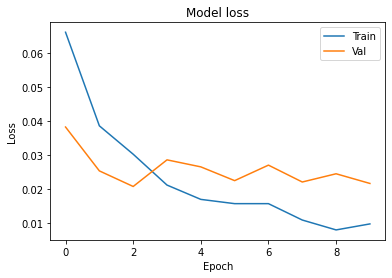

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

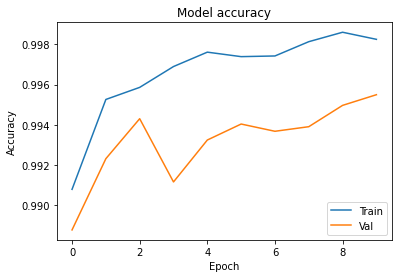

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**freq domain images**

In [ ]:
test_id, train_id, path_list = generatePathList(patients,test_size=0.3) # 30% test_size 
train_data = DataGenerator(train_id, path_list)
test_data  =  DataGenerator(test_id, path_list)

In [ ]:
len(train_data)

17608

In [ ]:
len(test_data)

7528

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
history = model.fit(train_data, epochs= 10, verbose=1, callbacks=[early_stop], steps_per_epoch=None, 
                    validation_data=test_data, class_weight={0:1, 1:50}, workers=4, use_multiprocessing=True,
                    shuffle=False, initial_epoch=0)

Epoch 1/10
17608/17608 [==============================] - 333s 19ms/step - loss: 0.3425 - accuracy: 0.9445 - sen: 0.9263 - val_loss: 0.1695 - val_accuracy: 0.9614 - val_sen: 0.2328
Epoch 2/10
17608/17608 [==============================] - 336s 19ms/step - loss: 0.2440 - accuracy: 0.9666 - sen: 0.9465 - val_loss: 0.1505 - val_accuracy: 0.9311 - val_sen: 0.4052
Epoch 3/10
17608/17608 [==============================] - 337s 19ms/step - loss: 0.2003 - accuracy: 0.9702 - sen: 0.9595 - val_loss: 0.1630 - val_accuracy: 0.9349 - val_sen: 0.4224
Epoch 4/10
17608/17608 [==============================] - 333s 19ms/step - loss: 0.1695 - accuracy: 0.9727 - sen: 0.9676 - val_loss: 0.1752 - val_accuracy: 0.9341 - val_sen: 0.6207
Epoch 5/10
17608/17608 [==============================] - 334s 19ms/step - loss: 0.1519 - accuracy: 0.9731 - sen: 0.9715 - val_loss: 0.1994 - val_accuracy: 0.9344 - val_sen: 0.5948
Epoch 6/10
17608/17608 [==============================] - 333s 19ms/step - loss: 0.1363 - accur

In [ ]:
model.save_weights('/content/drive/MyDrive/eeg_frequency_domain_image/model_weights_time_chb03.h5')
model.save('/content/drive/MyDrive/eeg_frequency_domain_image/model_keras_time_chb03.h5')

In [ ]:
model.evaluate(test_data, batch_size=32)

7528/7528 [==============================] - 73s 10ms/step - loss: 0.1916 - accuracy: 0.9370 - sen: 0.6121


[0.191630020737648, 0.9369810819625854, 0.6120689511299133]

In [ ]:
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)
y_val = []
for i in range(len(test_data)):
  list_val = list(test_data[i])
  y_val = np.hstack((y_val,list_val[1]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print('accuracy \t', accuracy_score(y_val, y_pred))
sensitivity = int(tp)/int(tp+fn)
print('sensitivity \t', sensitivity)
specificity = int(tn)/int(fp+tn)
print('specificity \t', specificity)
print('F1-score \t', f1_score(y_val, y_pred))

accuracy 	 0.9369811038788523
sensitivity 	 0.6120689655172413
specificity 	 0.9420660752833243
F1-score 	 0.23036755386565275


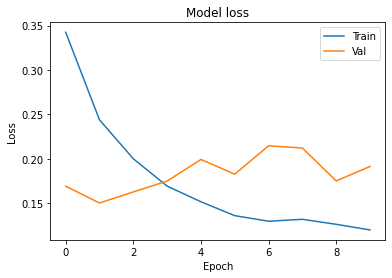

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

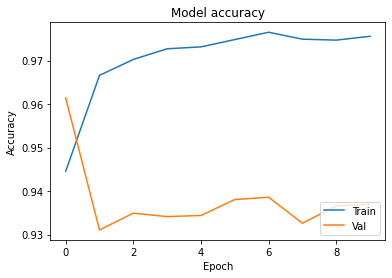

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**multi-view**

In [ ]:
test_id, train_id, path_list = generatePathList(patients,test_size=0.3) # 30% test_size 
train_data =  DataGenerator(train_id, path_list)
test_data  =  DataGenerator(test_id, path_list)

In [ ]:
len(test_data)

15088

In [ ]:
len(train_data)

35248

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
history = model.fit(train_data, epochs= 10, verbose=1, callbacks=[early_stop], steps_per_epoch=None, 
                    validation_data=test_data, class_weight={0:1, 1:50}, workers=4, use_multiprocessing=True,
                    shuffle=False, initial_epoch=0)

Epoch 1/10
35248/35248 [==============================] - 774s 22ms/step - loss: 0.2003 - accuracy: 0.9727 - sen: 0.9575 - val_loss: 0.1385 - val_accuracy: 0.9643 - val_sen: 0.5544
Epoch 2/10
35248/35248 [==============================] - 749s 21ms/step - loss: 0.1569 - accuracy: 0.9805 - sen: 0.9630 - val_loss: 0.0489 - val_accuracy: 0.9875 - val_sen: 0.4621
Epoch 3/10
35248/35248 [==============================] - 750s 21ms/step - loss: 0.1277 - accuracy: 0.9849 - sen: 0.9705 - val_loss: 0.0558 - val_accuracy: 0.9841 - val_sen: 0.5118
Epoch 4/10
35248/35248 [==============================] - 757s 21ms/step - loss: 0.1099 - accuracy: 0.9862 - sen: 0.9750 - val_loss: 0.0592 - val_accuracy: 0.9844 - val_sen: 0.5954
Epoch 5/10
35248/35248 [==============================] - 749s 21ms/step - loss: 0.0927 - accuracy: 0.9879 - sen: 0.9794 - val_loss: 0.0601 - val_accuracy: 0.9850 - val_sen: 0.6040
Epoch 6/10
35248/35248 [==============================] - 753s 21ms/step - loss: 0.0850 - accur

In [ ]:
model.save_weights('/content/drive/MyDrive/eeg_frequency_domain_image/model_weights_time_chb03_mix.h5')
model.save('/content/drive/MyDrive/eeg_frequency_domain_image/model_keras_time_chb03_mix.h5')

In [ ]:
model.evaluate(test_data, batch_size=32)

15088/15088 [==============================] - 191s 13ms/step - loss: 0.0643 - accuracy: 0.9866 - sen: 0.5997


[0.06428675353527069, 0.9866119027137756, 0.5997310280799866]

In [ ]:
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)
y_val = []
for i in range(len(test_data)):
  list_val = list(test_data[i])
  y_val = np.hstack((y_val,list_val[1]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print('accuracy \t', accuracy_score(y_val, y_pred))
sensitivity = int(tp)/int(tp+fn)
print('sensitivity \t', sensitivity)
specificity = int(tn)/int(fp+tn)
print('specificity \t', specificity)
print('F1-score \t', f1_score(y_val, y_pred))

accuracy 	 0.9866118769883351
sensitivity 	 0.5997310020174849
specificity 	 0.9926627273702567
F1-score 	 0.5797685606553113


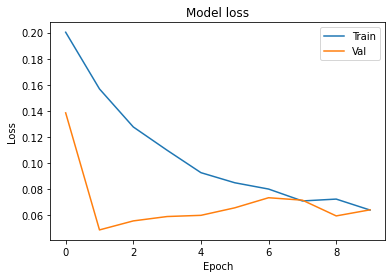

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

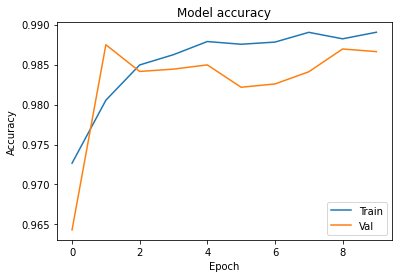

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()